# ML

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :]
y = iris.target
print ("Data point", X.shape[0])
print("Features", X.shape[1])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0) 


Data point 150
Features 4


In [23]:
# read in forest dataset
df_train = pd.read_csv('/data/ifu/summerschool/df_train.csv')
df_valid = pd.read_csv('/data/ifu/summerschool/df_valid.csv')
X_train, y_train = df_train.drop(['Cover_Type'], axis=1), df_train['Cover_Type']
X_test, y_test = df_valid.drop(['Cover_Type'], axis=1), df_valid['Cover_Type']

In [24]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

## Logistic regression

In [36]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs', max_iter=1000,
                          multi_class='multinomial').fit(X_train, y_train)

In [37]:
print( clf.score(X_train, y_train) )
print( clf.score(X_test, y_test) )

0.709700176366843
0.7150793650793651


In [55]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, clf.predict(X_test)) 

array([[304, 132,   1,   0,  26,  24,  53],
       [154, 226,  24,   1,  74,  52,   9],
       [  2,  18, 138,  72,  72, 238,   0],
       [  4,   0,  39, 394,   0, 103,   0],
       [112,  78,  55,   0, 236,  54,   5],
       [ 16,  23,  88,  34,  26, 353,   0],
       [161,  28,   2,   0,   0,   2, 347]])

## SVM

In [43]:
from sklearn.svm import LinearSVC

clf = LinearSVC(penalty='l2', loss='squared_hinge',
                dual=True, tol=0.0001, C=100, multi_class='ovr',
                fit_intercept=True, intercept_scaling=1, class_weight=None,verbose=0, random_state=0, max_iter=1000)
clf.fit(X_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=100, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
          verbose=0)

In [44]:
print(f'Accuracy of linear SVC on training set: {clf.score(X_train, y_train):.2f}')
print(f'Accuracy of linear SVC on test set: {clf.score(X_test, y_test):.2f}')

Accuracy of linear SVC on training set: 0.54
Accuracy of linear SVC on test set: 0.53


In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import numpy as np
    
c = np.logspace(start = -15, stop = 1000, base = 1.02)
param_grid = {'C': c}


grid = GridSearchCV(clf, param_grid =param_grid, cv=3, n_jobs=-1, scoring='accuracy')
grid.fit(X_train, y_train)
  
print("The best parameters are %s with a score of %0.0f" % (grid.best_params_, grid.best_score_ ))
print( "Best estimator accuracy on test set {:.2f} ".format(grid.best_estimator_.score(X_test, y_test)  ) )

[7.43014730e-01 1.11980870e+00 1.68768058e+00 2.54352885e+00
 3.83339069e+00 5.77736091e+00 8.70714775e+00 1.31226737e+01
 1.97773794e+01 2.98067867e+01 4.49222576e+01 6.77030119e+01
 1.02036230e+02 1.53780341e+02 2.31764671e+02 3.49296030e+02
 5.26429314e+02 7.93389557e+02 1.19572936e+03 1.80210176e+03
 2.71597473e+03 4.09328647e+03 6.16905376e+03 9.29747395e+03
 1.40123632e+04 2.11182438e+04 3.18276237e+04 4.79678917e+04
 7.22931329e+04 1.08954071e+05 1.64206323e+05 2.47477825e+05
 3.72977562e+05 5.62120108e+05 8.47179691e+05 1.27679729e+06
 1.92428044e+06 2.90011207e+06 4.37080263e+06 6.58730256e+06
 9.92782301e+06 1.49623718e+07 2.25500161e+07 3.39854693e+07
 5.12200133e+07 7.71944543e+07 1.16340926e+08 1.75339164e+08
 2.64256298e+08 3.98264652e+08]
The best parameters are {'C': 2.5435288546358152} with a score of 0
Best estimator accuracy on test set 0.68 


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [56]:
confusion_matrix(y_test, grid.best_estimator_.predict(X_test)) 

array([[355,  79,   2,   0,  44,   4,  56],
       [119, 254,  13,   1, 112,  34,   7],
       [  0,   2, 276,  74,  21, 167,   0],
       [  0,   0,  31, 474,   0,  35,   0],
       [ 14,  56,  53,   0, 396,  21,   0],
       [  0,  17,  94,  53,  47, 329,   0],
       [ 57,   3,   2,   0,   3,   0, 475]])

In [48]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [53]:
print( gnb.score(X_train, y_train) )
print( gnb.score(X_test, y_test) )

0.47257495590828924
0.46984126984126984


In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

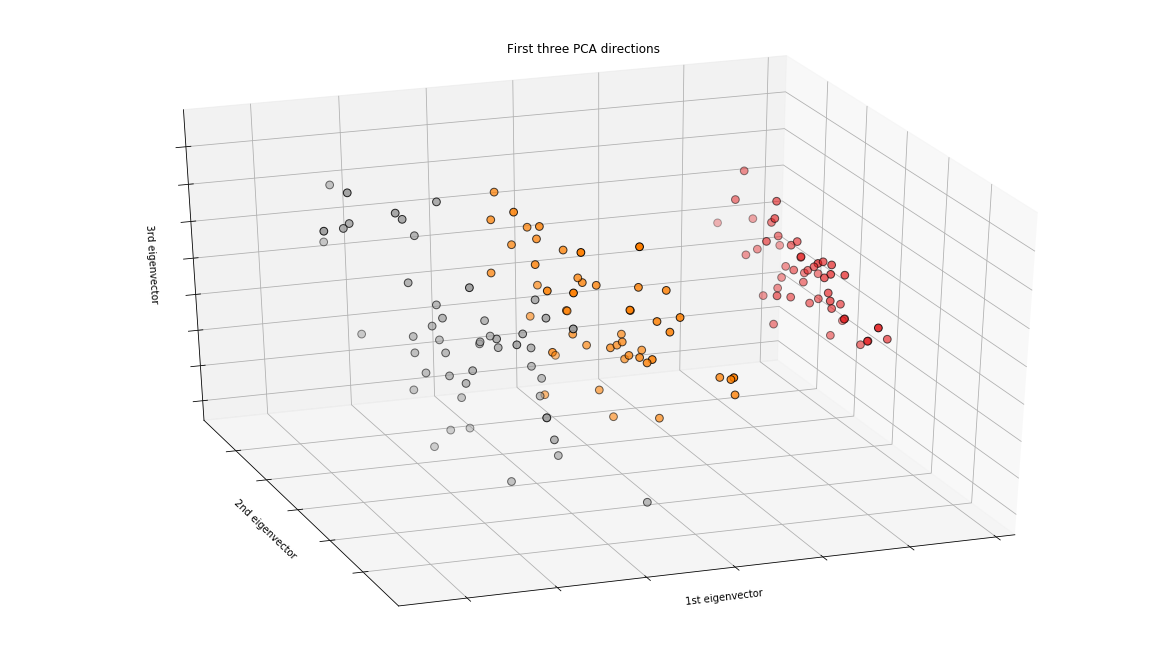

The number of features in the new subspace is  3


In [8]:
fig = plt.figure(1, figsize=(16, 9))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(X_scaled)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=60)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()
print("The number of features in the new subspace is " ,X_reduced.shape[1])

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                        X_reduced, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.svm import LinearSVC

clf = LinearSVC(penalty='l2', loss='squared_hinge',
                dual=True, tol=0.0001, C=100, multi_class='ovr',
                fit_intercept=True, intercept_scaling=1, class_weight=None,verbose=0
                , random_state=0, max_iter=1000)
clf.fit(X_train,y_train)

print('Accuracy of linear SVC on training set: {:.2f}'.format(clf.score(X_train, y_train)))

print('Accuracy of linear SVC on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of linear SVC on training set: 0.97
Accuracy of linear SVC on test set: 1.00


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import numpy as np
    
c = np.logspace(start = -15, stop = 1000, base = 1.02)
param_grid = {'C': c}


grid = GridSearchCV(clf, param_grid =param_grid, cv=3, n_jobs=-1, scoring='accuracy')
grid.fit(X_train, y_train)
  
print("The best parameters are %s with a score of %0.0f" % (grid.best_params_, grid.best_score_ * 100 ))
print( "Best estimator accuracy on test set {:.2f} ".format(grid.best_estimator_.score(X_test, y_test) * 100 ) )

The best parameters are {'C': 153.7803409519843} with a score of 96
Best estimator accuracy on test set 100.00 


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [12]:
from sklearn.svm import SVC

clf_SVC = SVC(C=100.0, kernel='rbf', degree=3, gamma='auto', coef0=0.0, shrinking=True, 
          probability=False, tol=0.001, cache_size=200, class_weight=None, 
          verbose=0, max_iter=-1, decision_function_shape="ovr", random_state = 0)
clf_SVC.fit(X_train,y_train)

print('Accuracy of SVC on training set: {:.2f}'.format(clf_SVC.score(X_train, y_train) * 100))

print('Accuracy of SVC on test set: {:.2f}'.format(clf_SVC.score(X_test, y_test) * 100))

Accuracy of SVC on training set: 99.17
Accuracy of SVC on test set: 100.00


In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import numpy as np
    
c_SVC = np.logspace(start = 0, stop = 10, num = 100, base = 2 , dtype = 'float64')
print( 'the generated array of c values')
print ( c_SVC )
param_grid_S = {'C': c_SVC}



print("\n Array of means \n")
clf = GridSearchCV(clf_SVC, param_grid =param_grid_S, cv=20 , scoring='accuracy')
clf.fit(X_train, y_train)
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
print(means)

y_true, y_pred = y_test, clf.predict(X_test)
print( '\nClassification report\n' )
print(classification_report(y_true, y_pred))

the generated array of c values
[1.00000000e+00 1.07252413e+00 1.15030800e+00 1.23373308e+00
 1.32320850e+00 1.41917304e+00 1.52209732e+00 1.63248610e+00
 1.75088073e+00 1.87786182e+00 2.01405211e+00 2.16011948e+00
 2.31678026e+00 2.48480272e+00 2.66501086e+00 2.85828845e+00
 3.06558332e+00 3.28791207e+00 3.52636502e+00 3.78211156e+00
 4.05640590e+00 4.35059319e+00 4.66611616e+00 5.00452215e+00
 5.36747075e+00 5.75674188e+00 6.17424455e+00 6.62202624e+00
 7.10228290e+00 7.61736977e+00 8.16981285e+00 8.76232139e+00
 9.39780109e+00 1.00793684e+01 1.08103658e+01 1.15943781e+01
 1.24352503e+01 1.33371059e+01 1.43043679e+01 1.53417796e+01
 1.64544288e+01 1.76477719e+01 1.89276611e+01 2.03003732e+01
 2.17726400e+01 2.33516817e+01 2.50452420e+01 2.68616263e+01
 2.88097423e+01 3.08991436e+01 3.31400770e+01 3.55435321e+01
 3.81212958e+01 4.08860094e+01 4.38512315e+01 4.70315038e+01
 5.04424225e+01 5.41007151e+01 5.80243221e+01 6.22324854e+01
 6.67458420e+01 7.15865259e+01 7.67782761e+01 8.23465